📊 Corrected Overall Student Satisfaction: 76.86%

📌 Corrected Average Satisfaction by Course:
Course_Name
FYBA                                91.000000
MSC ANALYTICAL CHEMISTRY SEM I      90.500000
TYBSC                               90.444444
MSC INFORMATION TECHNOLOGY - 1      90.000000
SYBMS                               87.142857
FY BCOM (BANKING & INSURANCE)       87.000000
M.SC PART - 2 COMPUTER SCIENCE      84.571429
MSC INFORMATION TECHNOLOGY - 3      84.166667
S.Y.B.A.F                           82.652174
TYBA                                82.411765
FYBMS                               81.384615
FY BCOM (ACCOUNTING & FINANCE)      80.391892
MSC ORGANIC CHEMISTRY - 3           79.470588
TYBMS                               77.000000
FYBSC                               76.250000
TYBCOM                              74.743590
MA PSYCHOLOGY - 1                   74.600000
SYBCOM                              74.027027
MSC MICROBIOLOGY - 3                73.857143
MSC ANALYTICAL CHEMI

/tmp/ipython-input-891113108.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=course_satisfaction.index, y=course_satisfaction.values, palette="viridis")


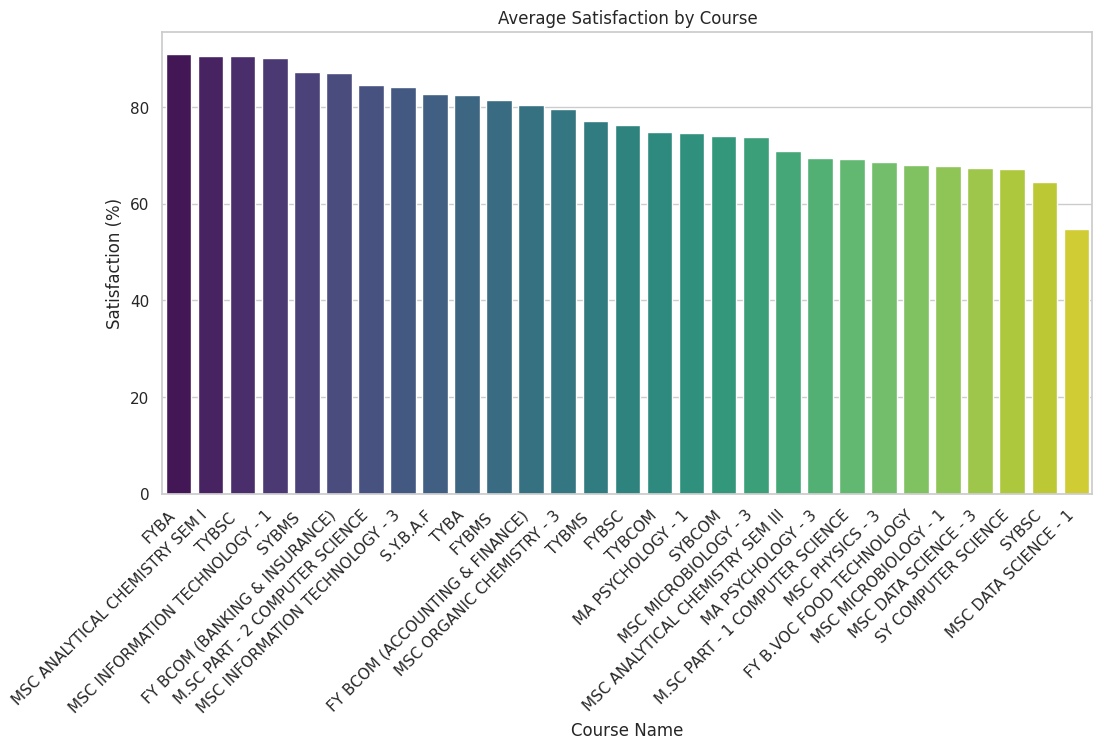

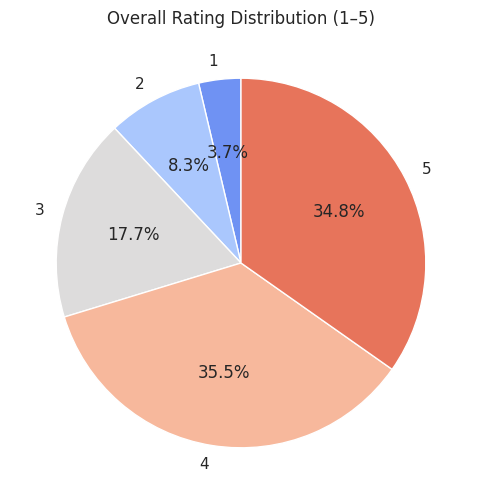

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


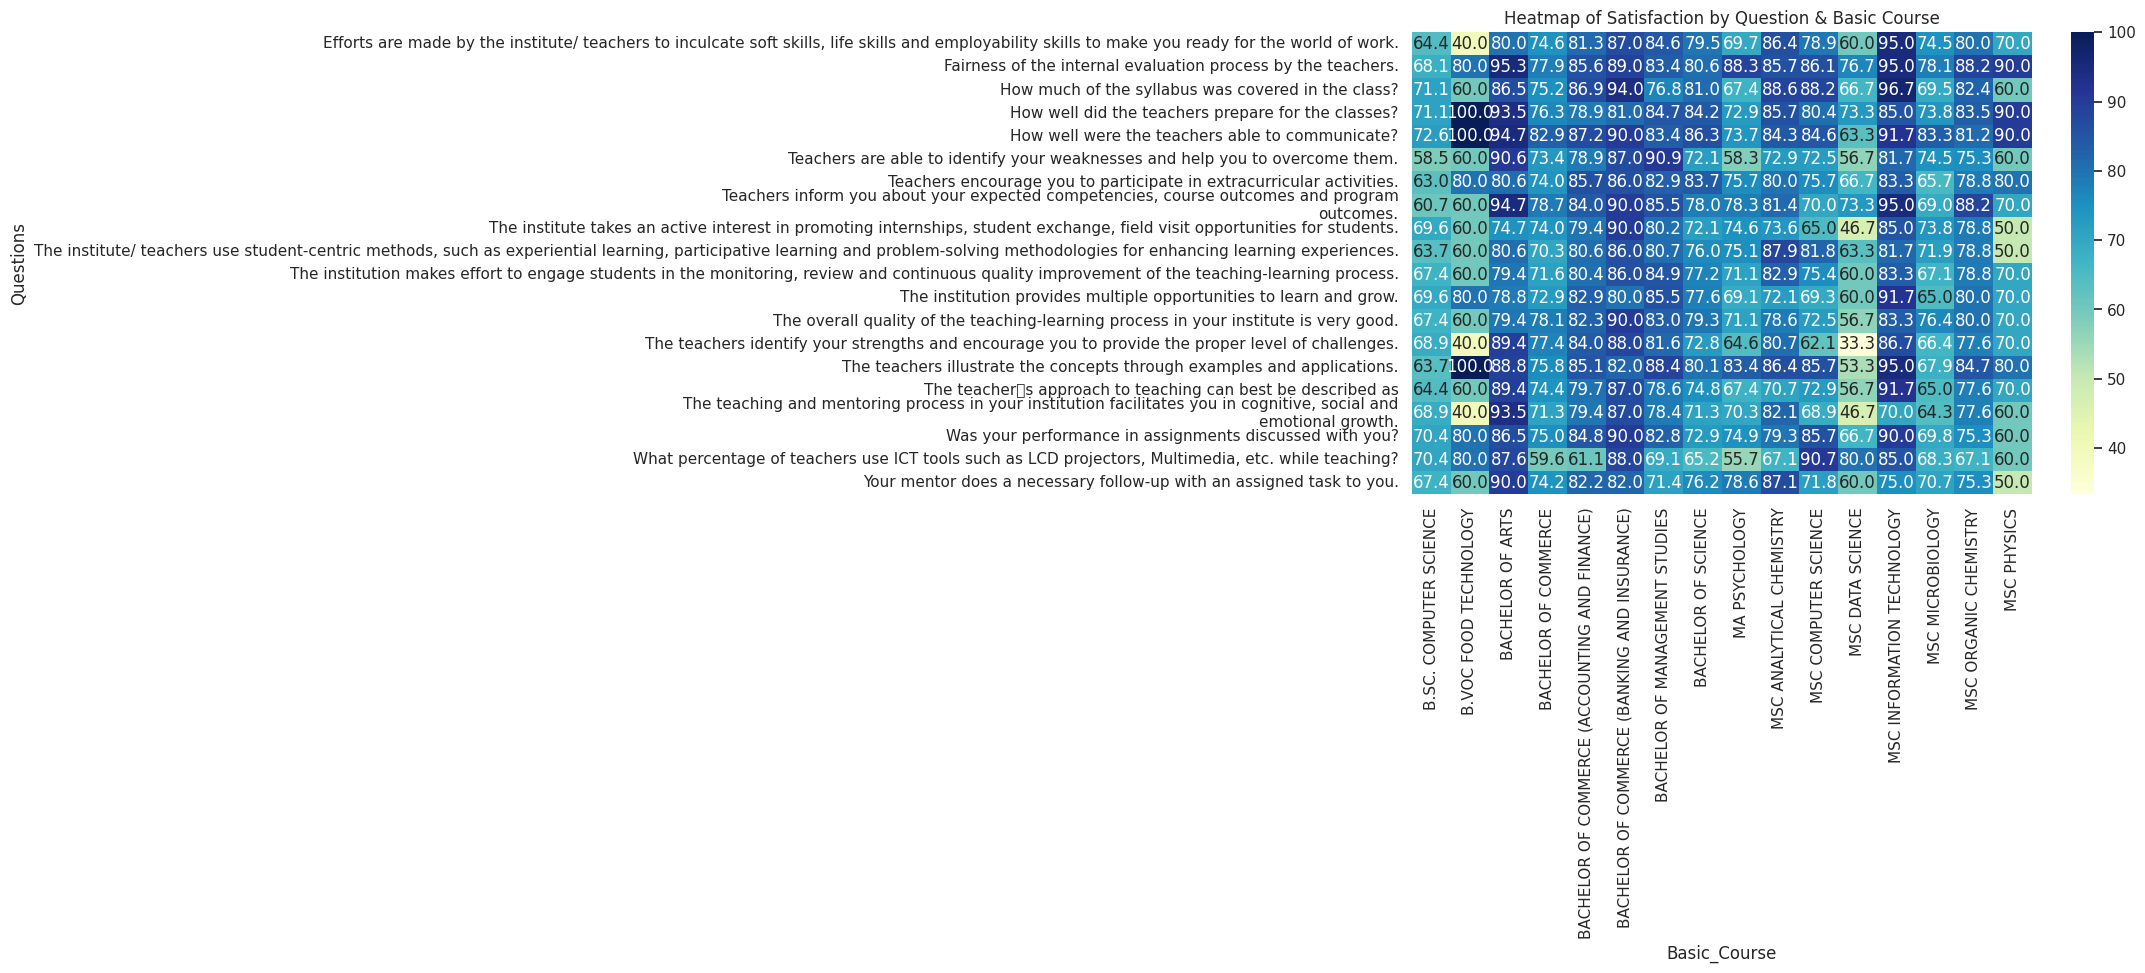

In [4]:
# --------------------------------------------
# 📌 Task 3 - College Event Feedback Analysis
# Student Satisfaction Survey
# --------------------------------------------

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------
# Step 1: Load Data
# -----------------------
# In Colab: from google.colab import files; files.upload()
df = pd.read_csv("Student_Satisfaction_Survey.csv", encoding="latin-1")

# -----------------------
# Step 2: Data Cleaning
# -----------------------
# Clean column names (remove spaces, replace with underscores)
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Convert weightages to numeric
for col in ['Weightage_1','Weightage_2','Weightage_3','Weightage_4','Weightage_5']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Total_Feedback_Given'] = pd.to_numeric(df['Total_Feedback_Given'], errors='coerce')

# -----------------------
# Step 3: Correct Satisfaction Calculation
# -----------------------
# Satisfaction % formula from weightages
df['Satisfaction_%'] = (
    (1*df['Weightage_1'] + 2*df['Weightage_2'] + 3*df['Weightage_3'] +
     4*df['Weightage_4'] + 5*df['Weightage_5'])
    / (df['Total_Feedback_Given'] * 5)
) * 100

# Overall average satisfaction
overall_satisfaction = df['Satisfaction_%'].mean()
print(f"📊 Corrected Overall Student Satisfaction: {overall_satisfaction:.2f}%")

# Average satisfaction per course
course_satisfaction = df.groupby('Course_Name')['Satisfaction_%'].mean().sort_values(ascending=False)
print("\n📌 Corrected Average Satisfaction by Course:")
print(course_satisfaction)

# Average satisfaction by basic course
basic_satisfaction = df.groupby('Basic_Course')['Satisfaction_%'].mean().sort_values(ascending=False)
print("\n📌 Corrected Average Satisfaction by Basic Course:")
print(basic_satisfaction)

# Top & bottom courses
print(f"\n🏆 Highest Rated Course: {course_satisfaction.idxmax()} ({course_satisfaction.max():.2f}%)")
print(f"⚠️ Lowest Rated Course: {course_satisfaction.idxmin()} ({course_satisfaction.min():.2f}%)")

# -----------------------
# Step 4: Visualizations
# -----------------------
sns.set(style="whitegrid", palette="muted")

# 1. Bar Chart - Avg satisfaction per course
plt.figure(figsize=(12,6))
sns.barplot(x=course_satisfaction.index, y=course_satisfaction.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Average Satisfaction by Course")
plt.ylabel("Satisfaction (%)")
plt.xlabel("Course Name")
plt.show()

# 2. Pie Chart - Overall rating distribution (weightages)
total_ratings = df[['Weightage_1','Weightage_2','Weightage_3','Weightage_4','Weightage_5']].sum()
plt.figure(figsize=(6,6))
plt.pie(total_ratings, labels=['1','2','3','4','5'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("coolwarm", 5))
plt.title("Overall Rating Distribution (1–5)")
plt.show()

# 3. Heatmap - Average satisfaction per question & basic course
question_avg = df.pivot_table(values='Satisfaction_%', index='Questions', columns='Basic_Course', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(question_avg, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Heatmap of Satisfaction by Question & Basic Course")
plt.show()
